In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7212 non-null   object
 1   Target  6916 non-null   object
dtypes: object(2)
memory usage: 112.8+ KB


In [3]:
tfid = TfidfVectorizer()
X_tfidf = tfid.fit_transform(data['Text'])
print("Shape of TF-IDF matrix:", X_tfidf.shape) 

Shape of TF-IDF matrix: (7212, 3248)


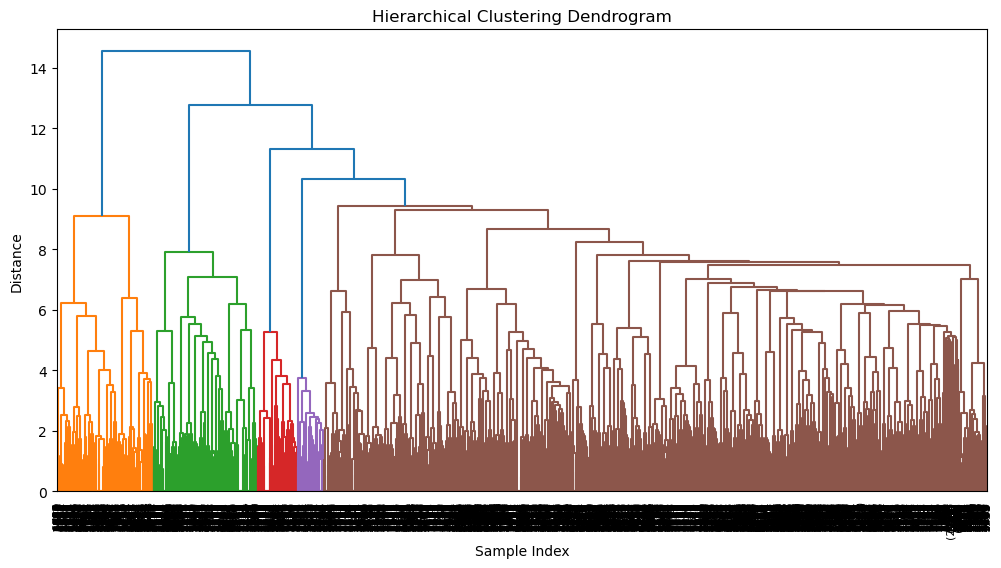

TypeError: missing a required argument: 'labels_pred'

In [6]:

linkage_matrix = linkage(X_tfidf.toarray(), method='ward')
hierarchical_labels = fcluster(linkage_matrix, 20, criterion='maxclust')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, leaf_rotation=90, leaf_font_size=8, truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Calculate Adjusted Rand Index between K-means and Hierarchical clustering results
ari = adjusted_rand_score( hierarchical_labels)

print(f"Adjusted Rand Index: {ari}")
